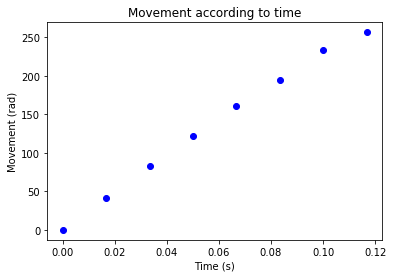

In [6]:
# Setup and calculate movement according to time
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

# Fetch the data
data = np.genfromtxt('csv/punch_3.csv', delimiter=',')

# Params of the video
fps = 59.94
dt = 1.0 / fps

# Params exp.
L = 1.1811 # Length of the rope (m)
m_to_px = 0.001528461 # Convert factor (m / px)
L_px = L / m_to_px # Length of the rope (px)
g = 9.8

# Number of points
N = data.shape[0]

# Init time array (X on the plot)
t = np.zeros((N))
for i in range(N):
    t[i] = i * dt
    
# Get movement
x = data[:, 0]
y = data[:, 1]
dx = x - x[0]
dy = y - y[0]
movement = np.sqrt(np.power(dx, 2) + np.power(dy, 2))

# Show the results
plt.xlabel('Time (s)')
plt.ylabel('Movement (rad)')
plt.title('Movement according to time')

plt.plot(t, movement, 'bo', label='sampled')
plt.show()

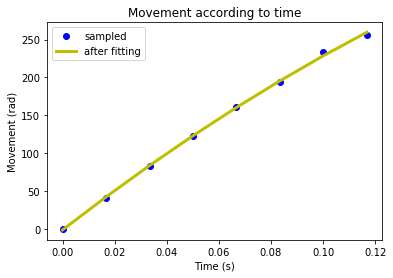

In [7]:
# Find the equation of the parabola

# Get params estimations
a, b, c = np.polyfit(t, movement, 2)

# Make 'data' to show on plot
data_fit = a * np.power(t, 2) + b * t + c

# Show the result
plt.xlabel('Time (s)')
plt.ylabel('Movement (rad)')
plt.title('Movement according to time')

plt.plot(t, movement, 'bo', label='sampled')
plt.plot(t, data_fit, label='after fitting', linewidth=3, color='y')
plt.legend()
plt.show()